In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
import sklearn.metrics as metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn import datasets
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

from helpers import cust_func

%matplotlib inline
#plt.rcParams['figure.figsize'] = [16, 9]
plt.style.use("fivethirtyeight")
%load_ext autoreload
%autoreload 2

In [2]:
iris = datasets.load_iris(as_frame=True)

In [3]:
X, y = iris.data, iris.target

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.3,
    random_state=42,
    stratify=y)

In [5]:
y_train, y_test = y_train.sort_values(), y_test.sort_values()
X_train, X_test = X_train.loc[y_train.index], X_test.loc[y_test.index]

In [6]:
X_train.head()
y_train.head()

3     0
13    0
6     0
41    0
16    0
Name: target, dtype: int32

In [7]:
pca_out = PCA(n_components=2).fit(X_train)

In [8]:
# Percentage of variance explained by the first two components
round(sum(pca_out.explained_variance_ratio_), 2)

0.98

In [9]:
# Factor scores
fscores = pca_out.transform(X_train)
fscores_test = pca_out.transform(X_test)

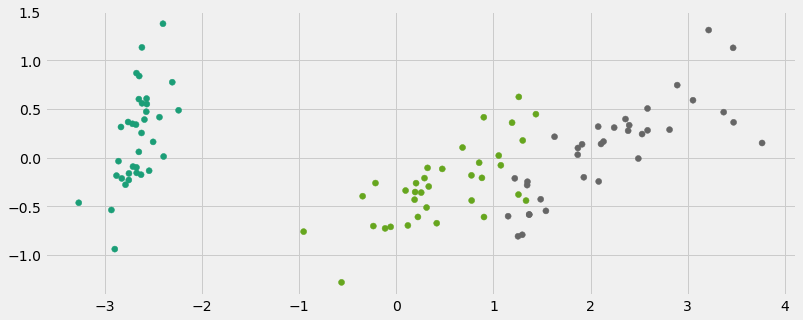

In [10]:
# Plot fscores for first two components
plt.figure(figsize=(12, 12))
sc = plt.scatter(fscores[:, 0], fscores[:, 1],
                 c=y_train, cmap=plt.cm.get_cmap('Dark2', 3))
ax = sc.axes
ax.set_aspect('equal')
plt.show()

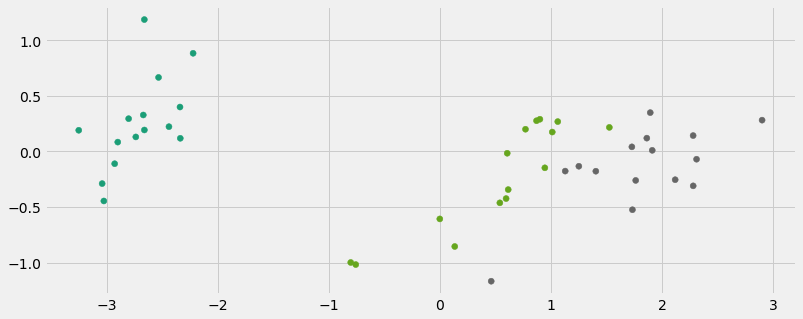

In [11]:
# Plot fscores_test for first two components
plt.figure(figsize=(12, 12))
sc = plt.scatter(fscores_test[:, 0], fscores_test[:, 1],
                 c=y_test, cmap=plt.cm.get_cmap('Dark2', 3))
ax = sc.axes
ax.set_aspect('equal')
plt.show()

In [12]:
n_neighbors = 5
knn = KNeighborsClassifier(n_neighbors=n_neighbors)
knn.fit(fscores, y_train) 

KNeighborsClassifier()

In [13]:
train_score = knn.score(fscores, y_train)
test_score = knn.score(fscores_test, y_test)
print(f"Train score: {round(train_score, 3)}")
print(f"Test score: {round(test_score, 3)}")

Train score: 0.981
Test score: 0.956


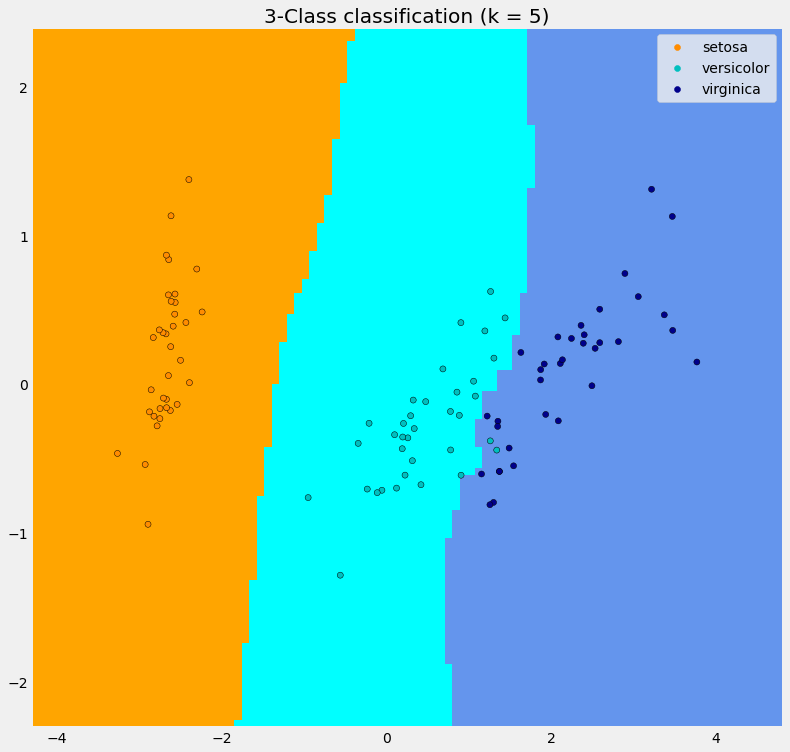

In [14]:
# https://scikit-learn.org/stable/auto_examples/neighbors/plot_classification.html#sphx-glr-auto-examples-neighbors-plot-classification-py

# Create color maps
cmap_light = ListedColormap(["orange", "cyan", "cornflowerblue"])
cmap_bold = ["darkorange", "c", "darkblue"]

fig, ax = plt.subplots(figsize=(12, 12))
DecisionBoundaryDisplay.from_estimator(
    knn,
    fscores,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    #xlabel=iris.feature_names[0],
    #ylabel=iris.feature_names[1],
    shading="auto",
)

# Plot also the training points
sns.scatterplot(
    x=fscores[:,0],
    y=fscores[:,1],
    hue=iris.target_names[y_train],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.title(
    "3-Class classification (k = %i)" % (n_neighbors)
)
plt.show()

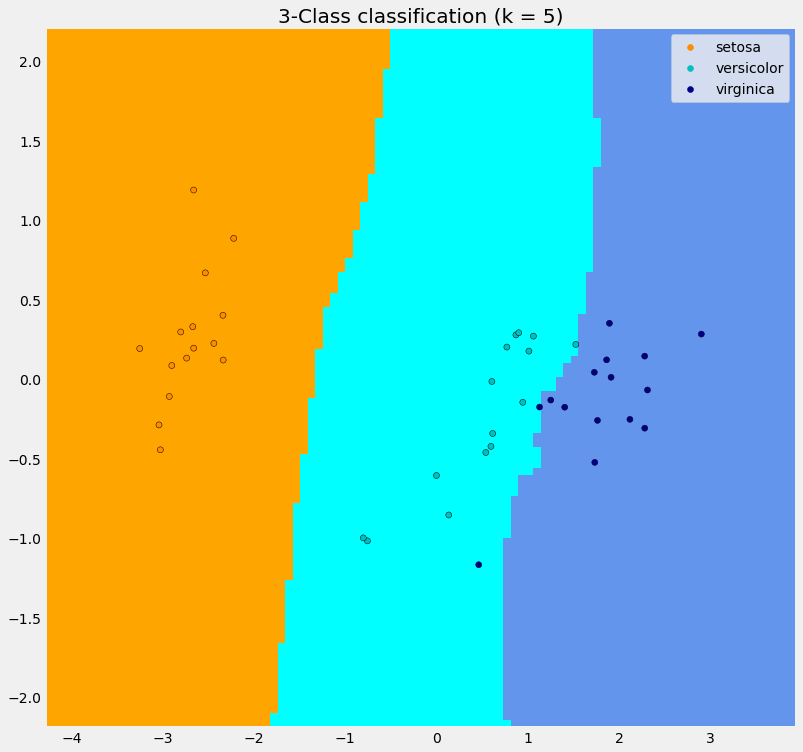

In [15]:
fig, ax = plt.subplots(figsize=(12, 12))
DecisionBoundaryDisplay.from_estimator(
    knn,
    fscores_test,
    cmap=cmap_light,
    ax=ax,
    response_method="predict",
    plot_method="pcolormesh",
    #xlabel=iris.feature_names[0],
    #ylabel=iris.feature_names[1],
    shading="auto",
)

# Plot also the test points
sns.scatterplot(
    x=fscores_test[:,0],
    y=fscores_test[:,1],
    hue=iris.target_names[y_test],
    palette=cmap_bold,
    alpha=1.0,
    edgecolor="black",
)
plt.title(
    "3-Class classification (k = %i)" % (n_neighbors)
)
plt.show()